In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
#Import the data
report_2015=pd.read_csv(filepath_or_buffer='C:/Users/Quan Bui/Documents/Python/Waterloo Course/Group Assignment/datasets_894_813759_2015.csv', sep=',',header=0)
report_2016=pd.read_csv(filepath_or_buffer='C:/Users/Quan Bui/Documents/Python/Waterloo Course/Group Assignment/datasets_894_813759_2016.csv', sep=',',header=0)
report_2017=pd.read_csv(filepath_or_buffer='C:/Users/Quan Bui/Documents/Python/Waterloo Course/Group Assignment/datasets_894_813759_2017.csv', sep=',',header=0)
report_2018=pd.read_csv(filepath_or_buffer='C:/Users/Quan Bui/Documents/Python/Waterloo Course/Group Assignment/datasets_894_813759_2018.csv', sep=',',header=0)
report_2019=pd.read_csv(filepath_or_buffer='C:/Users/Quan Bui/Documents/Python/Waterloo Course/Group Assignment/datasets_894_813759_2019.csv', sep=',',header=0)
# Add a year reference column for each data file
report_2019['Year']='2019'
report_2018['Year']='2018'
report_2017['Year']='2017'
report_2016['Year']='2016'
report_2015['Year']='2015'


In [3]:
#Rename the data sets to faciliate joining data across the years
report_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score','Health..Life.Expectancy.':"Health (Life Expectancy)"}, inplace=True)
report_2018.rename(columns={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score','Healthy life expectancy':"Health (Life Expectancy)",'Country or region':'Country'}, inplace=True)
report_2019.rename(columns={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score','Healthy life expectancy':"Health (Life Expectancy)",'Country or region':'Country'}, inplace=True)

In [4]:
#Select columns related to Happiness and Health
report_2015=report_2015[['Happiness Rank','Happiness Score','Country', 'Region','Health (Life Expectancy)','Year']]
report_2016=report_2016[['Happiness Rank','Happiness Score','Country', 'Region','Health (Life Expectancy)','Year']]
report_2017=report_2017[['Happiness Rank','Happiness Score','Country','Health (Life Expectancy)','Year']]
report_2018=report_2018[['Happiness Rank','Happiness Score','Country','Health (Life Expectancy)','Year']]
report_2019=report_2019[['Happiness Rank','Happiness Score','Country','Health (Life Expectancy)','Year']]

In [5]:
# As data from 2017 - 2019 do not have "Region" information; I leveraged the 2015 data to create a dictionary between Country and Region
country_dict=report_2015.set_index('Country').to_dict()['Region']

In [6]:
#Create Region column for dataset 2017-2019 based on 2015 data dictionary
report_2017['Region'] = report_2017['Country'].map(country_dict)
report_2018['Region'] = report_2018['Country'].map(country_dict)
report_2019['Region'] = report_2019['Country'].map(country_dict)


In [7]:
# Fill NA values in column Region with 'TBD'. 
#NA values are because some countries in the 2016-2019 data might be named differently or did not exist in in the 2015 data
report_2015['Region'] = report_2015['Region'].replace(np.nan, 'TBD')
report_2016['Region'] = report_2016['Region'].replace(np.nan, 'TBD')
report_2017['Region'] = report_2017['Region'].replace(np.nan, 'TBD')

In [8]:
#Joined all the data together across years and calculated the percentage that Health (Life Expectancy) contributes to the Happiness Score
joint_report= pd.concat([report_2015,report_2016,report_2017,report_2018,report_2019])
joint_report['Health % Contribution']= (joint_report['Health (Life Expectancy)']/joint_report['Happiness Score']) * 100
joint_report['Region'] = joint_report['Region'].replace(np.nan, 'TBD')

In [9]:
# Fill NA values in the column Region with 'TBD'. 
#There are only about 6-7 countries each year (out of 150+ countries) where the Region information could not be found.
#Consequently,these items will be dropped from the region analysis as the average per region will not be impacted significantly by a few countries
joint_report['Region'] = joint_report['Region'].replace(np.nan, 'TBD')
joint_report[joint_report.Region == 'TBD']

,Happiness Rank,Happiness Score,Country,Region,Health (Life Expectancy),Year,Health % Contribution
32,33,6.422,Taiwan Province of China,TBD,0.793984,2017,12.363504
49,50,5.956,Belize,TBD,0.450192,2017,7.558626
70,71,5.472,"Hong Kong S.A.R., China",TBD,0.943062,2017,17.234328
92,93,5.151,Somalia,TBD,0.113989,2017,2.212952
110,111,4.574,Namibia,TBD,0.338612,2017,7.402969
146,147,3.591,South Sudan,TBD,0.163486,2017,4.552659
37,38,6.192,Trinidad & Tobago,TBD,0.564000,2018,9.108527
48,49,5.956,Belize,TBD,0.474000,2018,7.958361
57,58,5.835,Northern Cyprus,TBD,0.909000,2018,15.578406
97,98,4.982,Somalia,TBD,0.115000,2018,2.308310


Text(0, 0.5, 'Percentage')

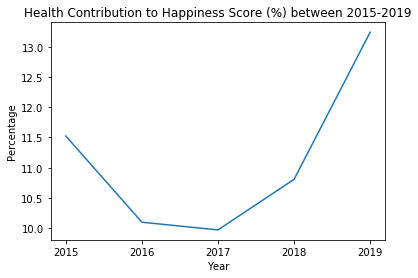

In [10]:
#Plot of Health Contribution to the Happiness Score
by_year=joint_report.groupby('Year').mean()
by_year=by_year[['Happiness Score', 'Health (Life Expectancy)','Health % Contribution']]
plt.plot(by_year.index,by_year['Health % Contribution'])
plt.title('Health Contribution to Happiness Score (%) between 2015-2019')
plt.xlabel('Year')
plt.ylabel('Percentage')

In [11]:
by_year

,Happiness Score,Health (Life Expectancy),Health % Contribution
Year,,,
2015,5.375734,0.630259,11.524510
2016,5.382185,0.557619,10.100097
2017,5.354019,0.551341,9.972792
2018,5.375917,0.597346,10.808207
2019,5.407096,0.725244,13.238464


Text(0, 0.5, 'Score')

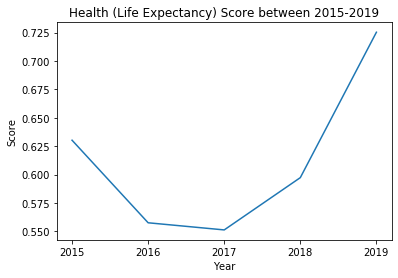

In [12]:
#Plot of Health (Life Expectancy) Score. Notice that it is the same trend as the Health % Contribution
by_year=joint_report.groupby('Year').mean()
by_year=by_year[['Happiness Score', 'Health (Life Expectancy)','Health % Contribution']]
plt.plot(by_year.index,by_year['Health (Life Expectancy)'])
plt.title('Health (Life Expectancy) Score between 2015-2019')
plt.xlabel('Year')
plt.ylabel('Score')

Text(0.5, 0, 'Year')

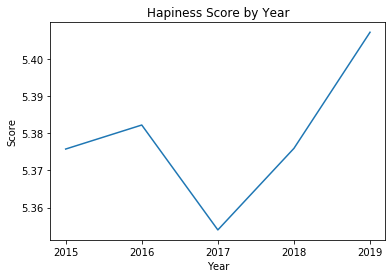

In [13]:
#Plot of the Happiness Score
plt.plot(by_year.index,by_year['Happiness Score'])
plt.title('Hapiness Score by Year')
plt.ylabel('Score')
plt.xlabel('Year')

In [14]:
# Happiness and health data grouped by Region and Year 
by_region_year=joint_report.groupby(['Region','Year'])[['Happiness Score', 'Health (Life Expectancy)','Health % Contribution']].mean()
by_region_year=by_region_year.reset_index()
by_region_year = by_region_year[by_region_year.Region != 'TBD']
by_region_year

,Region,Year,Happiness Score,Health (Life Expectancy),Health % Contribution
0,Australia and New Zealand,2015,7.285000,0.919965,12.628231
1,Australia and New Zealand,2016,7.323500,0.841080,11.484894
2,Australia and New Zealand,2017,7.299000,0.830323,11.376279
3,Australia and New Zealand,2018,7.298000,0.893000,12.237214
4,Australia and New Zealand,2019,7.267500,1.031000,14.187240
5,Central and Eastern Europe,2015,5.332931,0.718774,13.635007
6,Central and Eastern Europe,2016,5.370690,0.631592,11.910866
7,Central and Eastern Europe,2017,5.409931,0.636090,11.897377
8,Central and Eastern Europe,2018,5.463966,0.686690,12.683405
9,Central and Eastern Europe,2019,5.571786,0.808500,14.628874


Text(0.5, 1.0, 'Health % Contribution to Happiness between 2015-2019 by Region')

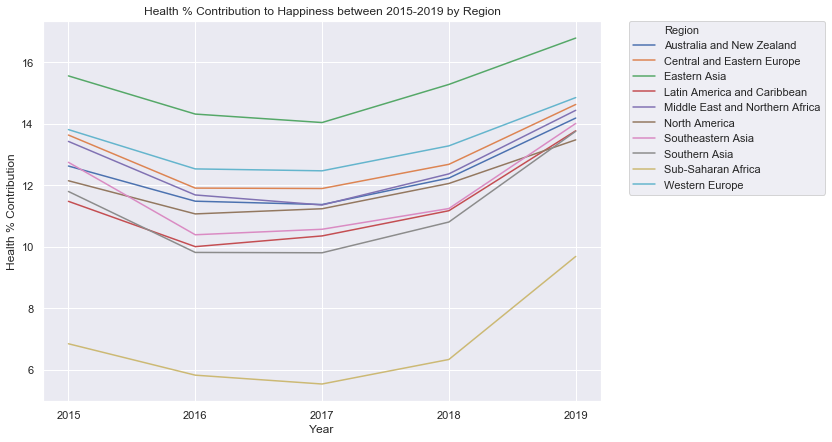

In [15]:
# Health % contribution to the Happiness Score by Region
sb.set(rc={'figure.figsize':(10,7)})
sb.lineplot(data=by_region_year, x='Year', y='Health % Contribution', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Health % Contribution to Happiness between 2015-2019 by Region')

Text(0.5, 1.0, 'Happiness between 2015-2019 by Region')

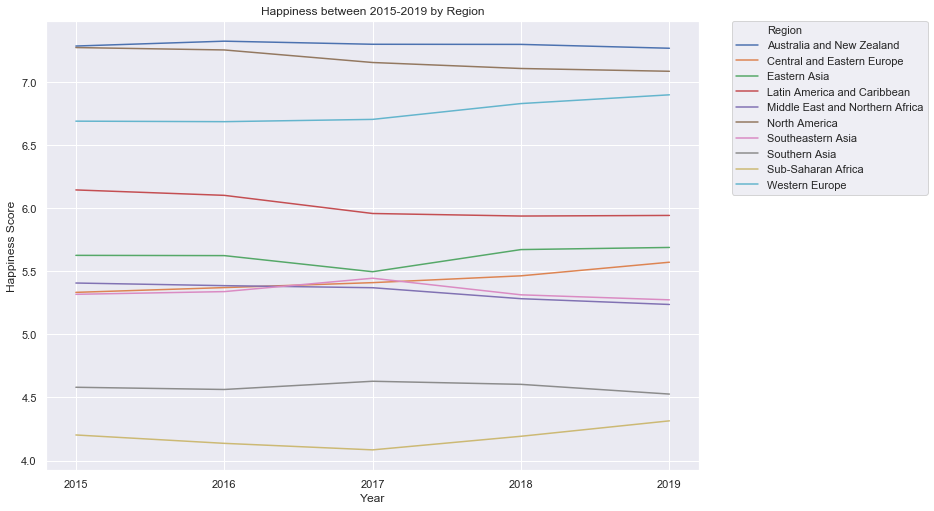

In [16]:
#Happiness Score by Region
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.lineplot(data=by_region_year, x='Year', y='Happiness Score', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Happiness between 2015-2019 by Region')

In [17]:
# Top 10 countries by Health score in 2019
top10_2019=joint_report[joint_report['Year'] == '2019'].sort_values('Health (Life Expectancy)', ascending=False).head(10)
top10_2019

,Happiness Rank,Happiness Score,Country,Region,Health (Life Expectancy),Year,Health % Contribution
33,34,6.262,Singapore,Southeastern Asia,1.141,2019,18.221016
75,76,5.430,Hong Kong,Eastern Asia,1.122,2019,20.662983
57,58,5.886,Japan,Eastern Asia,1.088,2019,18.484540
29,30,6.354,Spain,Western Europe,1.062,2019,16.713881
5,6,7.480,Switzerland,Western Europe,1.052,2019,14.064171
23,24,6.592,France,Western Europe,1.045,2019,15.852549
48,49,6.046,Cyprus,Western Europe,1.042,2019,17.234535
63,64,5.718,Northern Cyprus,TBD,1.042,2019,18.223155
35,36,6.223,Italy,Western Europe,1.039,2019,16.696127
8,9,7.278,Canada,North America,1.039,2019,14.275900


In [18]:
# Bottom 10 countries by Health Score in 2019
bottom10_2019=joint_report[joint_report['Year'] == '2019'].sort_values('Health (Life Expectancy)', ascending=False).tail(10)
bottom10_2019

,Happiness Rank,Happiness Score,Country,Region,Health (Life Expectancy),Year,Health % Contribution
127,128,4.390,Mali,Sub-Saharan Africa,0.308,2019,7.015945
155,156,2.853,South Sudan,TBD,0.295,2019,10.339993
111,112,4.668,Somalia,TBD,0.268,2019,5.741217
84,85,5.265,Nigeria,Sub-Saharan Africa,0.245,2019,4.653371
128,129,4.374,Sierra Leone,Sub-Saharan Africa,0.242,2019,5.532693
98,99,4.944,Ivory Coast,Sub-Saharan Africa,0.232,2019,4.692557
131,132,4.350,Chad,Sub-Saharan Africa,0.192,2019,4.413793
143,144,3.802,Lesotho,Sub-Saharan Africa,0.168,2019,4.418727
154,155,3.083,Central African Republic,Sub-Saharan Africa,0.105,2019,3.405774
134,135,4.212,Swaziland,Sub-Saharan Africa,0.000,2019,0.000000


In [19]:
# Top 10 countries by Health percentage contribution to the Hapiness Score in 2019
top10health_2019=joint_report[joint_report['Year'] == '2019'].sort_values('Health % Contribution',ascending=False).head(10)
top10health_2019

,Happiness Rank,Happiness Score,Country,Region,Health (Life Expectancy),Year,Health % Contribution
75,76,5.430,Hong Kong,Eastern Asia,1.122,2019,20.662983
129,130,4.366,Sri Lanka,Southern Asia,0.831,2019,19.033440
81,82,5.287,Greece,Western Europe,0.999,2019,18.895404
106,107,4.719,Albania,Central and Eastern Europe,0.874,2019,18.520873
57,58,5.886,Japan,Eastern Asia,1.088,2019,18.484540
151,152,3.334,Rwanda,Sub-Saharan Africa,0.614,2019,18.416317
123,124,4.461,Tunisia,Middle East and Northern Africa,0.815,2019,18.269446
63,64,5.718,Northern Cyprus,TBD,1.042,2019,18.223155
33,34,6.262,Singapore,Southeastern Asia,1.141,2019,18.221016
115,116,4.559,Armenia,Central and Eastern Europe,0.815,2019,17.876727


In [20]:
# Top 10 countries by Health percentage contribution to the Hapiness Score in 2019
bottom10health_2019=joint_report[joint_report['Year'] == '2019'].sort_values('Health % Contribution',ascending=False).tail(10)
bottom10health_2019

,Happiness Rank,Happiness Score,Country,Region,Health (Life Expectancy),Year,Health % Contribution
127,128,4.390,Mali,Sub-Saharan Africa,0.308,2019,7.015945
95,96,5.044,Cameroon,Sub-Saharan Africa,0.331,2019,6.562252
111,112,4.668,Somalia,TBD,0.268,2019,5.741217
128,129,4.374,Sierra Leone,Sub-Saharan Africa,0.242,2019,5.532693
98,99,4.944,Ivory Coast,Sub-Saharan Africa,0.232,2019,4.692557
84,85,5.265,Nigeria,Sub-Saharan Africa,0.245,2019,4.653371
143,144,3.802,Lesotho,Sub-Saharan Africa,0.168,2019,4.418727
131,132,4.350,Chad,Sub-Saharan Africa,0.192,2019,4.413793
154,155,3.083,Central African Republic,Sub-Saharan Africa,0.105,2019,3.405774
134,135,4.212,Swaziland,Sub-Saharan Africa,0.000,2019,0.000000
